In [20]:
from keras.layers import Input ,Lambda , Dense , Flatten
from keras import Model
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator  ,load_img
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# ImageDataGenerator : Data augmentation .to create more images

In [3]:
# re-size all image
IMAGE_SIZE = [224 , 224]
train_path = 'Datasets/Train/*'
test_path = 'Datasets/Test/*'

In [4]:
#Import ResNet50  library as shown below and add preprocessing layer to the front of the ResNet
# weights we are using imagenet weights :since Resnet has trained with imagenet images weight
#include_top : In resnet o/p is of 1000 categories but our project has only 3 cat , we should not include top layer with 1000 cat
resnet = ResNet50(input_shape =IMAGE_SIZE + [3] , weights='imagenet' ,include_top=False)

C:\Users\Rakshu\Anaconda3\envs\tensorflow\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [5]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [6]:
#dont traiin existing weights , we are just reusing the resnet weights
# traverse each layer of resnet n set tainable to false
for layer in resnet.layers:
    layer.trainable =False

In [7]:
#get number of output classes by glob fun
#Glob function :get the num of folders

folders = glob('Datasets/Train/*')
folders

['Datasets/Train\\audi',
 'Datasets/Train\\lamborghini',
 'Datasets/Train\\mercedes']

In [8]:
#Flatten the layer from resnet

x= Flatten()(resnet.output)

In [9]:
#Add output dense layer as per the number of o/p classes
prediction = Dense(len(folders) , activation='softmax')(x)

In [10]:
#Create model object
model = Model( inputs = resnet.input , outputs=prediction)

In [11]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [12]:
# tell the model waht cost n optimization method to use

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [13]:
# Image DataGenerator to import the images from dataset
#Read image fomr folder n applies augmentation like  flipping ,spatial variance
#Each pixel(ranges b/w 0-255) shud be converted into 0 to 1 hence divide by 255
#Test data no need to do DataAugmentation
train_datagen = ImageDataGenerator(rescale = 1./255 ,
                                  shear_range = 0.2,
                                  zoom_range =0.2,
                                  horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale= 1/255)

In [14]:
#Make sure you provide same target size as initialized imput size

training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                target_size =(224,224),
                                                batch_size =32 ,
                                                class_mode='categorical')

Found 64 images belonging to 3 classes.


In [17]:
test_set = test_datagen.flow_from_directory('Datasets/Test',
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode='categorical')

Found 58 images belonging to 3 classes.


In [22]:
#Fit model
r = model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs = 10,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set))

Epoch 1/10
2/2 [==============================] - 53s 26s/step - loss: 1.1176e-08 - accuracy: 1.0000 - val_loss: 28.8244 - val_accuracy: 0.3276
Epoch 2/10
2/2 [==============================] - 52s 26s/step - loss: 3.7253e-09 - accuracy: 1.0000 - val_loss: 28.9958 - val_accuracy: 0.3276
Epoch 3/10
2/2 [==============================] - 52s 26s/step - loss: 1.3039e-08 - accuracy: 1.0000 - val_loss: 30.1708 - val_accuracy: 0.3276
Epoch 4/10
2/2 [==============================] - 52s 26s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 32.3868 - val_accuracy: 0.3276
Epoch 5/10
2/2 [==============================] - 52s 26s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 31.0032 - val_accuracy: 0.3276
Epoch 6/10
2/2 [==============================] - 52s 26s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 30.9675 - val_accuracy: 0.3276
Epoch 7/10
2/2 [==============================] - 63s 32s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 23.6449 - val_accuracy:

#For PIL error : if cant install pil ,pip install pillow

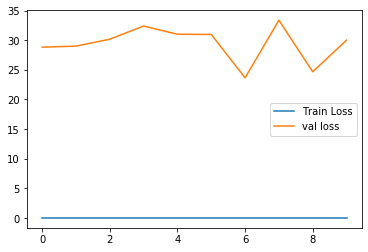

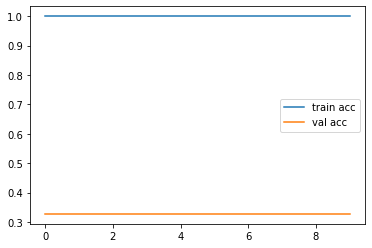

<Figure size 432x288 with 0 Axes>

In [24]:
#plot the loss
plt.plot(r.history['loss'] ,label='Train Loss')
plt.plot(r.history['val_loss'],label ='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

#plot the accuracy
plt.plot(r.history['accuracy'] ,label='train acc')
plt.plot(r.history['val_accuracy'] ,label='val acc')
plt.legend()
plt.show()
plt.savefig("AccVal_acc")


In [25]:
model.save('model_resnet50.h5')

In [26]:
y_pred = model.predict(test_set)

In [27]:
y_pred = np,argmax(y_pred,axis=1)

NameError: name 'argmax' is not defined